# Processing of US Coastguard GPS disruption data

## Prerequisites

### Installs

In [1]:
%pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 78.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Imports

In [10]:
import pandas as pd
from datetime import datetime as dt

## Webscrape
Run this to webscrape the data to files. If you already have the data locally, skip this section.

### Web scrape GPS interruptions

In [ ]:
table_list = pd.read_html(r'https://navcen.uscg.gov/gps-problem-report-status')

In [ ]:
table_list[0].to_csv('gps_navcen.csv',index=False)

## Processing and Analysis

### Load from csv files

In [13]:
gps_disruption_df=pd.read_csv('gps_navcen.csv')

In [14]:
gps_disruption_df['User']=gps_disruption_df['Description'].str.split(pat='NAVCEN:',n=1,expand=True)[0]
gps_disruption_df['NAVCEN']=gps_disruption_df['Description'].str.split(pat='NAVCEN:',n=1,expand=True)[1]

In [15]:
gps_disruption_df

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,User,NAVCEN
0,04/24/2024 22:35:00 Eastern African Time,NaN,Communications,USER: VSAT Communications including Data and v...,Unknown Interference,04/30/2024,USER: VSAT Communications including Data and v...,The GPS Operations Center reviewed the GPS Co...
1,04/18/2024 17:52:00 Eastern African Time,NaN,Marine,USER: Bab El Mandeb strait NAVCEN: The GPS Ope...,Unknown Interference,04/22/2024,USER: Bab El Mandeb strait,The GPS Operations Center reviewed the GPS Co...
2,04/12/2024 11:20:00 Middle East Time,NaN,NaN,USER: CALLER REPORTED A POSSIBLE CYBER SECURIT...,Unknown Interference,04/15/2024,USER: CALLER REPORTED A POSSIBLE CYBER SECURIT...,The GPS Operations Center reviewed the GPS Co...
3,04/11/2024 12:30:00 Eastern African Time,NaN,Marine,USER: Our vessel on entering Gulf of Aqaba exp...,Unknown Interference,04/15/2024,USER: Our vessel on entering Gulf of Aqaba exp...,The GPS Operations Center reviewed the GPS Co...
4,04/11/2024 18:38:00 GMT,NaN,Marine,"USER: On 11th April, 1838 UTC, MT Toya while a...",Unknown Interference,04/15/2024,"USER: On 11th April, 1838 UTC, MT Toya while a...",The GPS Operations Center reviewed the GPS Co...
...,...,...,...,...,...,...,...,...
544,01/03/2017 11:AM CST,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019,User: The GPS systems in normal mode not milit...,Report referred to FCC. FCC conducted an inve...
545,01/02/2017 3:00 EST,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019,User: GPS would say when you plug in that ther...,The GPS Operations Center reviewed the GPS Co...
546,01/01/2017 12:00 EST,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019,"User: My business is located in Elizabeth, NJ....",User provided information on how to contact m...
547,11/16/2016 7h37 UTC,"Rennes, France",Research,User: I experimented high range error on PRN 3...,User Equipment,05/20/2019,User: I experimented high range error on PRN 3...,The GPS Operations Center reviewed the GPS Co...


## Analyse disruptions by date

In [16]:
gps_disruption_df['local_date']=gps_disruption_df['Disruption Date/Time']\
.apply(lambda x:dt.strptime(x[0:10],'%m/%d/%Y'))

The local date is the UTC date with up to 0.5 day error. That's not bad for analysis to the nearest day. This will have to be improved for more precise analysis.

<Axes: xlabel='local_date'>

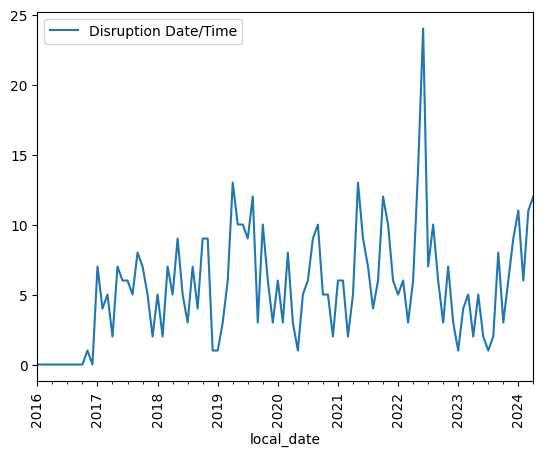

In [17]:
(gps_disruption_df
    .resample('ME', on='local_date')
    .count()
    [['Disruption Date/Time']]
    .loc["2016":]
    .plot(rot=90)
)

## Analyse disruptions by location

### Clean up Location to get country/code 

In [19]:
gps_disruption_df['location_state_country']=(gps_disruption_df['Location'].str.upper()
 .str.split(pat=',',n=1,expand=True)[1].str.strip()
 .combine_first(
     gps_disruption_df['Location'].str.upper()
     .str.split(pat=',',n=1,expand=True)[0].str.strip()
 )
 #.combine_first(list(sovereign_states['Country name (using title case)']) in gps_disruption_df['Location']
 .replace('LIMASSOL','CYPRUS')
 .replace('STRAIT OF HORMUZ','IRAN')
 .replace('STRAITS OF HORMUZ','IRAN')
 .replace('PRC','CHINA')
 .replace('EAST OF MALTA','MALTA') #.contains approach?
 .replace('ISTANBUL','TURKEY')
 .replace('SUEZ CANAL','EGYPT')
                                             
)

In [20]:
gps_disruption_df[['Location','location_state_country','Cause']]

,Location,location_state_country,Cause
0,NaN,NaN,Unknown Interference
1,NaN,NaN,Unknown Interference
2,NaN,NaN,Unknown Interference
3,NaN,NaN,Unknown Interference
4,NaN,NaN,Unknown Interference
...,...,...,...
544,San Angelo Airport,SAN ANGELO AIRPORT,Unintentional Interference
545,North Carolina - South Carolina border,NORTH CAROLINA - SOUTH CAROLINA BORDER,User Equipment
546,"Elizabeth, NJ",NJ,Mapping Issue
547,"Rennes, France",FRANCE,User Equipment


### Cause Analysis

<Axes: ylabel='Cause'>

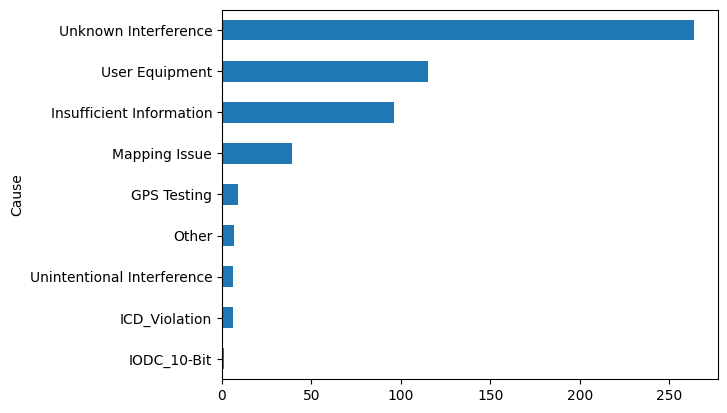

In [21]:
gps_disruption_df.groupby('Cause').count()['Disruption Date/Time'].sort_values().plot(kind='barh')

### Focus on Unknown Interference

In [22]:
gps_disruption_counted=(gps_disruption_df[gps_disruption_df['location_state_country'].notna() 
    & gps_disruption_df.Cause.str.contains('Unknown Interference')]
                        .groupby('location_state_country')
                        .count()['Disruption Date/Time']
                        .sort_values()
                       )

<Axes: ylabel='location_state_country'>

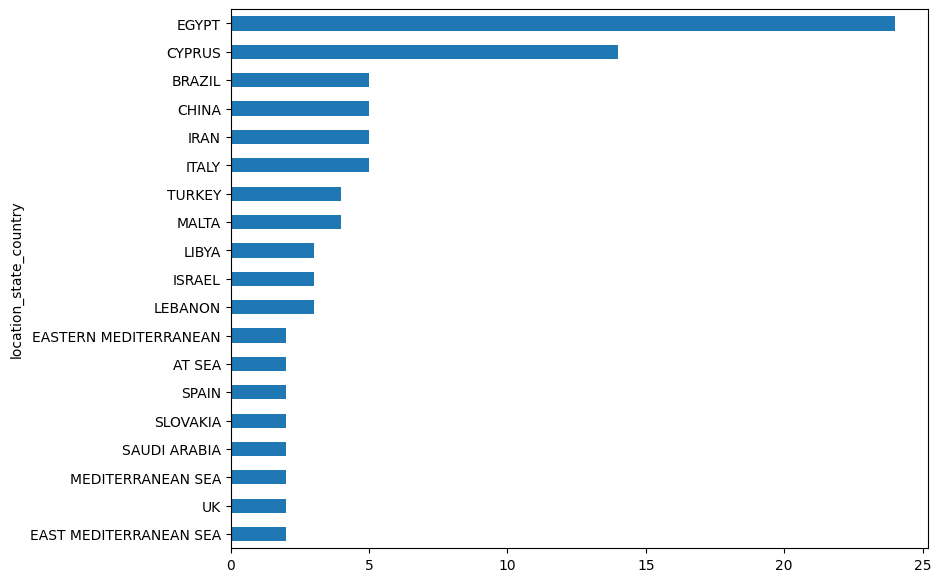

In [23]:
gps_disruption_counted[gps_disruption_counted>1].plot(kind='barh',figsize=[9,7])

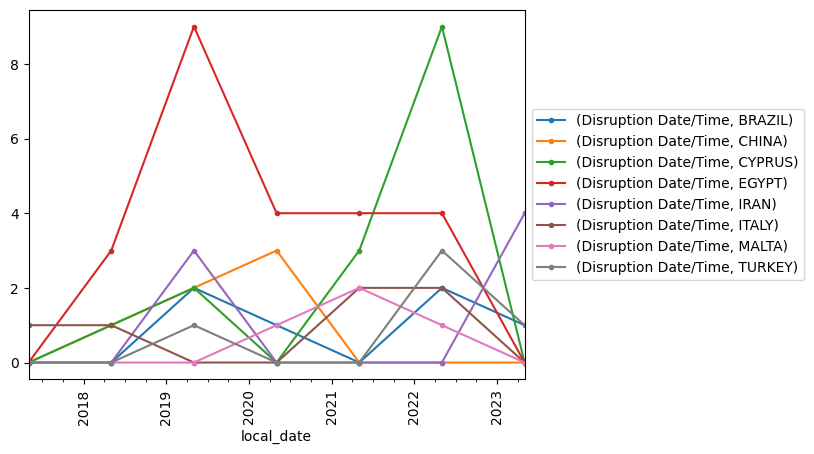

In [24]:
(gps_disruption_df
    .query("location_state_country in "+'[\"'+'\",\"'.join(list(gps_disruption_counted[gps_disruption_counted>3].index))+'\"]')
    .groupby(['local_date','location_state_country'])
    .count()
    [['Disruption Date/Time']]
    .unstack() 
    .resample('12ME')
    .sum()
    .plot(rot=90,marker='.')#,kind='bar')
    .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

In [45]:
for disruption in gps_disruption_df.query('location_state_country=="EGYPT"')[['Location','local_date','User']].set_index(['local_date','Location'])[['User']].itertuples():
    print(disruption)
    print('\n')


Pandas(Index=(Timestamp('2021-08-11 00:00:00'), 'Port Said,Egypt'), User='USER: At 0300LT while getting underway from anchorage C-3, North Anchorage, Port Said, Egypt the vessel lost DGPS signal due to heavy Interference. We have two units on board. DGPS#2 regained signal after a couple of minutes while DGPS unit #1 had to be factory reset and rebooted several times before it was able to acquire satellites later in the day. Is this a common occurrence in the Suez Canal or was just an anomaly? The Suez canal Pilots said it is a common occurrence in the canal. ')


Pandas(Index=(Timestamp('2021-07-09 00:00:00'), 'Egypt'), User='User: Vessel was making way and lost GPS function. ')


Pandas(Index=(Timestamp('2021-07-02 00:00:00'), 'OFF PORT SAID, Egypt'), User='User: Both GPS reciever losing position fix intermittently.. ')


Pandas(Index=(Timestamp('2021-06-30 00:00:00'), 'Suez Canal'), User='User: On receiver display: "Signal lost". Ships in vincinity confirmed similar signal loss.. ')


In [47]:
(gps_disruption_df
    .query('location_state_country=="EGYPT"')
    [['Location','local_date','User']]
    .set_index('local_date')
    .to_csv('Suez_sample_RIN.csv')
)
 
